# 🌍 Market Making Dance Revolution  
### A Simple Python Simulator to Understand Risk in Financial Markets


## 📌 Project Summary (Easy Version)

This project shows how **market makers** work in real stock markets.

Market makers:
- Always buy
- Always sell
- Earn small profit from price difference

But during **news events**, they can lose money.

This notebook simulates that problem using **Python**,  
so anyone can understand **why losses happen**.


### Step 1: Import required tools

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### Step 2: Set basic market rules

In [2]:
np.random.seed(42)

TIME_STEPS = 500
INITIAL_PRICE = 100

BASE_SPREAD = 0.2
VOLATILITY_LOW = 0.001
VOLATILITY_HIGH = 0.01


### Step 3: Simulate market price movement

In [3]:
prices = [INITIAL_PRICE]
volatility = VOLATILITY_LOW

for t in range(1, TIME_STEPS):
    if t == 250:  # market becomes volatile
        volatility = VOLATILITY_HIGH
    change = np.random.normal(0, volatility)
    prices.append(prices[-1] + change)

prices = np.array(prices)


### Step 4: Increase market risk

In [18]:
# Stress scenario: extreme volatility
stress_prices = prices.copy()
stress_prices[350:] += np.random.normal(0, 5, len(stress_prices[350:]))


### Step 5: Add a news event

In [4]:
NEWS_TIME = 300
NEWS_IMPACT = 3   # sudden good news

prices[NEWS_TIME:] += NEWS_IMPACT


### Step 6: Define trader behavior

In [5]:
def get_trader_type(t):
    if t >= NEWS_TIME and np.random.rand() < 0.7:
        return "informed"
    return "uninformed"


### Step 7: Track market maker position

In [6]:
inventory = 0
cash = 0

inventory_history = []
pnl_history = []


### Step 8: Decide buy and sell prices

In [7]:
def calculate_spread(base_spread, inventory, volatility):
    spread = base_spread
    spread += abs(inventory) * 0.01     # inventory risk
    spread += volatility * 10           # market risk
    return spread


In [14]:
def calculate_spread_fixed(base_spread):
    return base_spread

def calculate_spread_inventory(base_spread, inventory):
    return base_spread + abs(inventory) * 0.01


### Step 9: Run the market simulation

In [15]:
for t in range(TIME_STEPS):
    
    price = prices[t]
    volatility = VOLATILITY_HIGH if t > 250 else VOLATILITY_LOW
    
    spread = calculate_spread_inventory(BASE_SPREAD, inventory)
    bid = price - spread / 2
    ask = price + spread / 2
    
    trader = get_trader_type(t)
    
    if trader == "uninformed":
        action = np.random.choice(["buy", "sell"])
    else:
        action = "buy"   # informed trader attacks market maker
    
    if action == "buy":
        inventory -= 1
        cash += ask
    else:
        inventory += 1
        cash -= bid
    
    inventory_history.append(inventory)
    pnl_history.append(cash + inventory * price)


In [16]:
spread = calculate_spread_fixed(BASE_SPREAD)

### Step 10: Calculate final outcome

In [9]:
print("Final P&L:", pnl_history[-1])
print("Max Inventory:", max(np.abs(inventory_history)))


Final P&L: 150.28941796512845
Max Inventory: 145


### Step 11: Measure risk, not just profit


In [17]:
pnl_array = np.array(pnl_history)
returns = np.diff(pnl_array)

sharpe_ratio = returns.mean() / returns.std()
max_drawdown = (pnl_array - np.maximum.accumulate(pnl_array)).min()

print("Sharpe Ratio:", sharpe_ratio)
print("Max Drawdown:", max_drawdown)


Sharpe Ratio: 0.03121865878438805
Max Drawdown: -462.6009285274595


### Step 12: Visualize what happened

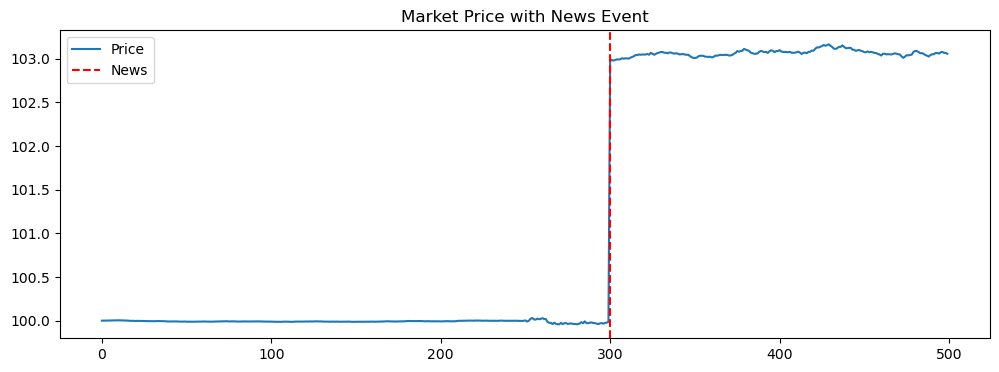

In [10]:
plt.figure(figsize=(12,4))
plt.plot(prices, label="Price")
plt.axvline(NEWS_TIME, color="red", linestyle="--", label="News")
plt.legend()
plt.title("Market Price with News Event")
plt.show()


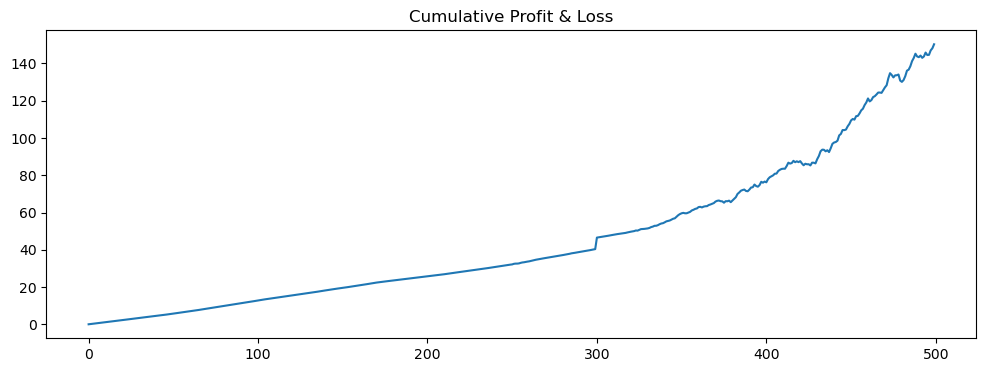

In [11]:
plt.figure(figsize=(12,4))
plt.plot(pnl_history)
plt.title("Cumulative Profit & Loss")
plt.show()


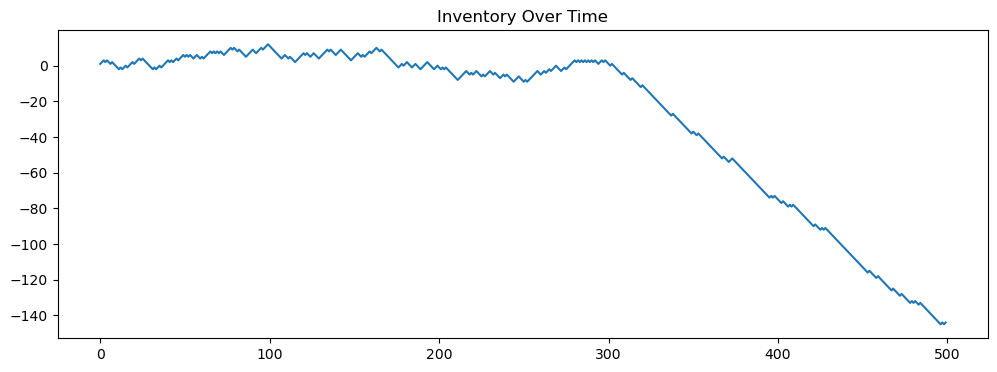

In [12]:
plt.figure(figsize=(12,4))
plt.plot(inventory_history)
plt.title("Inventory Over Time")
plt.show()


### Final Note

This project shows that  
real success is about managing risk,  
not chasing quick profit.
